# <center>Metody Numeryczne</center>

# Laboratorium 5: Równania liniowe MxN


**Wykonał:** \<imię i nazwisko\>

<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania układów równań liniowych w postaci macierzowej, w szczególności z wykorzystaniem rzadkich macierzy prostokątnych.

Dana jest prostokątna macierz $\mathbf{A}$ o wymiarach $m \times n$ oraz wektor kolumnowy $\mathbf{b}$ o wymiarach $m \times 1$. Należy rozwiązać układ równań postaci:
 
$$
\mathbf{Ax}=\mathbf{b}
$$
  
gdzie:
- $\mathbf{A}$ - macierz współczynników z lewej strony równania, 
- $\mathbf{x}$ - wektor zmiennych,
- $\mathbf{b}$ - wektor wyników prawej strony równania.  

Do oceny jakości rozwiązania wykorzystywać będziemy residuum (ang. *residual*):

$$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$$


### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- Do wykonania analizy zużycia pamięci potrzebna jest biblioteka [*memory_profiler*](https://pypi.org/project/memory-profiler/), która do poprawnego działania wymaga doinstalowania pakietu [*setuptools*](https://pypi.org/project/setuptools/). Po instalacji bibliotek może wystąpić błąd związany z brakiem modułu *distutils*. Należy go zignorować i przeładować okno VSCode (lub zrestartować kernela).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`.

---

In [1]:
!python -m pip install numpy scipy matplotlib memory_profiler setuptools

import main

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

%load_ext memory_profiler

---

### **Zadanie 1.**

Zdefiniuj funkcję *`spare_matrix_Abt()`* generującą wektor $m$-wymiarowy $\mathbf{t}$, którego wartości należą do przedziału $[0,1]$ (za pomocą funkcji [`np.linspace()`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)). Na podstawie tego wektora funkcja powinna zwracać:
- $\mathbf{b}$ - wektor $m$-wymiarowy, którego wartości dane są funkcją $\cos(4t)$,
- $\mathbf{A}$ - macierz postaci: 

$$
\left[
\begin{matrix}
    1       & t_0      & t_{0}^{2}    & \cdots  & t_{0}^{n-1}   \\
    1       & t_1      & t_{1}^{2}    & \cdots  & t_{1}^{n-1}   \\
    1       & t_2      & t_{2}^{2}    & \cdots  & t_{2}^{n-1}   \\
    \vdots  & \vdots   & \vdots       & \ddots  & \vdots        \\
    1       & t_{m-1}  & t_{m-1}^{2}  & \cdots  & t_{m-1}^{n-1} 
\end{matrix}
\right]
$$  

> **Wskazówka:** Do definicji macierzy $\mathbf{A}$ można użyć funkcji [`np.vander()`](https://numpy.org/doc/stable/reference/generated/numpy.vander.html) z odpowiednio dobranymi parametrami.

In [ ]:
def spare_matrix_Abt(m: int, n: int) -> tuple[np.ndarray, np.ndarray] | None:
    if not isinstance(m, int) or not isinstance(n, int) or m <= 0 or n <= 0:
        return None 
    t=np.linspace(0, 1, m)
    b = np.cos(4 * t)
    A=np.vander(t, N=n, increasing=True)
    return A, b

---

### **Zadanie 2.**

Korzystając z funkcji zaimplementowanej w **Zadaniu 1.**, oraz mając dane $m = 50$ i $n = 12$, rozwiąż układ równań $\mathbf{Ax}=\mathbf{b}$ postaci:

$$
\left[
\begin{matrix}
    1       & t_0      & t_{0}^{2}    & \cdots  & t_{0}^{n-1}   \\
    1       & t_1      & t_{1}^{2}    & \cdots  & t_{1}^{n-1}   \\
    1       & t_2      & t_{2}^{2}    & \cdots  & t_{2}^{n-1}   \\
    \vdots  & \vdots   & \vdots       & \ddots  & \vdots        \\
    1       & t_{m-1}  & t_{m-1}^{2}  & \cdots  & t_{m-1}^{n-1} 
\end{matrix}
\right]
\left[
\begin{matrix}
    x_0    \\
    x_1    \\
    x_2    \\
    \vdots \\
    x_{n-1}
\end{matrix}
\right]
=
\left[
\begin{matrix}
    b_0    \\
    b_1    \\
    b_2    \\
    \vdots \\
    b_{m-1}
\end{matrix}
\right]
$$

za pomocą następujacych metod:

1. Przekształcenia układu równań do postaci $\mathbf{A}^{\mathrm{T}}\mathbf{Ax}=\mathbf{A}^{\mathrm{T}}\mathbf{b}$ i stosując funkcję [`np.linalg.solve()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html). Aby wyznaczyć $\mathbf{A}^{\mathrm{T}}\mathbf{A}$ oraz $\mathbf{A}^{\mathrm{T}}\mathbf{b}$ zaimplementuj funkcję *`square_from_rectan()`*.

2. Użycia dedykowanej metody z biblioteki numpy do rozwiązywania problemu najmniejszych kwadratów&mdash;funkcji [`np.linalg.lstsq()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html).  

3. Rozkładu QR podanego na wykładzie i wyznaczenia rozwiązania dla układu równań z macierzą trójkątną. Użyć należy funkcji [`np.linalg.qr()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.qr.html) i [`sp.linalg.solve_triangular()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve_triangular.html).

4. Rozkładu SVD podanego na wykładzie. Użyć należy funkcji [`np.linalg.svd()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html).

Po zaimplementowaniu powyższych metod przeprowadź profilowanie kodu w celu analizy czasu wykonania oraz zużycia pamięci każdej z nich. Porównaj jakość otrzymanych wyników.

In [7]:
# ===== Twoja implementacja tutaj =====
from scipy.stats import norm
import time
import tracemalloc
from scipy.linalg import solve_triangular
[A,b]=spare_matrix_Abt(50,12)
def square_from_rectan(
    A: np.ndarray, b: np.ndarray
) -> tuple[np.ndarray, np.ndarray] | None:
    if not isinstance(A, np.ndarray) or not isinstance(b, np.ndarray):
        return None
    if A.shape[0] != b.shape[0]:
        return None
    A_new = A.T @ A
    b_new = A.T @ b
    return A_new, b_new
[A_new, b_new]=square_from_rectan(A,b)


tracemalloc.start()
start = time.perf_counter()
x=np.linalg.solve(A_new,b_new)
end = time.perf_counter()
current, peak = tracemalloc.get_traced_memory()
tracemalloc.stop()
t1 = end - start
m1 = peak / 1024  
print("\nRozwiązanie korzystając z solve:\n", x)


tracemalloc.start()
start = time.perf_counter()
x_sq=np.linalg.lstsq(A,b,rcond=None)[0]
end = time.perf_counter()
current, peak = tracemalloc.get_traced_memory()
tracemalloc.stop()
t2 = end - start
m2 = peak / 1024
print("\nRozwiązanie korzystając z lstsq:\n", x_sq)



tracemalloc.start()
start = time.perf_counter()
Q, R = np.linalg.qr(A, mode='complete')
x_qr = sp.linalg.solve_triangular(R[:A.shape[1], :], Q.T[:A.shape[1], :] @ b)
end = time.perf_counter()
current, peak = tracemalloc.get_traced_memory()
tracemalloc.stop()
t3 = end - start
m3 = peak / 1024
print("\nRozwiązanie korzystając z QR:\n", x_qr)

tracemalloc.start()
start = time.perf_counter()
U, S, Vt = np.linalg.svd(A_new)
S_inv = np.diag(1 / S)
x_svd = Vt.T @ S_inv @ U.T @ b_new
end = time.perf_counter()
current, peak = tracemalloc.get_traced_memory()
tracemalloc.stop()
t4 = end - start
m4 = peak / 1024
print("\nRozwiązanie korzystając z SVD:\n", x_svd)




Rozwiązanie korzystając z solve:
 [ 9.99999996e-01  1.04022684e-06 -8.00003783e+00  5.32702533e-04
  1.06628060e+01  1.64680905e-02 -5.73387920e+00  8.50955487e-02
  1.50260458e+00  1.47570865e-01 -4.33615483e-01  9.88100741e-02]

Rozwiązanie korzystając z lstsq:
 [ 1.00000000e+00 -4.22742747e-07 -7.99998124e+00 -3.18763179e-04
  1.06694308e+01 -1.38202867e-02 -5.64707563e+00 -7.53160186e-02
  1.69360696e+00  6.03211341e-03 -3.74241705e-01  8.80405764e-02]

Rozwiązanie korzystając z QR:
 [ 1.00000000e+00 -4.22742763e-07 -7.99998124e+00 -3.18763193e-04
  1.06694308e+01 -1.38202872e-02 -5.64707563e+00 -7.53160213e-02
  1.69360696e+00  6.03211095e-03 -3.74241704e-01  8.80405762e-02]

Rozwiązanie korzystając z SVD:
 [ 9.99999983e-01  5.48362732e-06 -8.00018311e+00  2.80761719e-03
  1.06435547e+01  1.01562500e-01 -5.96875000e+00  5.00000000e-01
  1.00000000e+00  5.00000000e-01 -5.93750000e-01  1.28906250e-01]


In [9]:

norms = [
    np.linalg.norm(A @ x - b),
    np.linalg.norm(A @ x_sq - b),
    np.linalg.norm(A @ x_qr - b),
    np.linalg.norm(A @ x_svd - b),
]


times = [t1, t2, t3, t4]
memories = [m1, m2, m3, m4]


print("Wyznaczona norma residuum dla kolejnych metod obliczeń:")
print(f"Pierwsza metoda (solve)  :  {norms[0]:.3e}")
print(f"Druga metoda (lstsq)     :  {norms[1]:.3e}")
print(f"Trzecia metoda (QR)      :  {norms[2]:.3e}")
print(f"Czwarta metoda (SVD)     :  {norms[3]:.3e}")

print("\nCzas wykonywania dla kolejnych metod obliczeń:")
print(f"Pierwsza metoda (solve)  :  {times[0]:.6f} s")
print(f"Druga metoda (lstsq)     :  {times[1]:.6f} s")
print(f"Trzecia metoda (QR)      :  {times[2]:.6f} s")
print(f"Czwarta metoda (SVD)     :  {times[3]:.6f} s")

print("\nUżyta pamięć dla kolejnych metod obliczeń (KB):")
print(f"Pierwsza metoda (solve)  :  {memories[0]:.2f}")
print(f"Druga metoda (lstsq)     :  {memories[1]:.2f}")
print(f"Trzecia metoda (QR)      :  {memories[2]:.2f}")
print(f"Czwarta metoda (SVD)     :  {memories[3]:.2f}")


Wyznaczona norma residuum dla kolejnych metod obliczeń:
Pierwsza metoda (solve)  :  2.664e-08
Druga metoda (lstsq)     :  7.999e-09
Trzecia metoda (QR)      :  7.999e-09
Czwarta metoda (SVD)     :  5.860e-02

Czas wykonywania dla kolejnych metod obliczeń:
Pierwsza metoda (solve)  :  0.001106 s
Druga metoda (lstsq)     :  0.006267 s
Trzecia metoda (QR)      :  0.002356 s
Czwarta metoda (SVD)     :  0.001249 s

Użyta pamięć dla kolejnych metod obliczeń (KB):
Pierwsza metoda (solve)  :  21.01
Druga metoda (lstsq)     :  21.08
Trzecia metoda (QR)      :  193.44
Czwarta metoda (SVD)     :  25.03


---

### **Zadanie 3.**

Dane są wydatki ($\mathbf{w}$) oraz dochody ($\mathbf{d}$) dla pewnego gospodarstwa:

$$
\begin{align*}
    \mathbf{w} &= (140, 190, 250, 270, 290, 310, 340, 360, 420, 390)\\
    \mathbf{d} &= (210, 270, 290, 310, 370, 400, 450, 480, 510, 520)
\end{align*}
$$


1. Utwórz regresję liniową zależności wydatków od dochodów.

2. Przeanalizuj jaki jest błąd uzyskanej prostej względem danych. Czy istnieje możliwość uzyskania lepszego wyniku?

> **Wskazówka:** W celu wyznaczenia współczynników wykorzystaj niniejszą informację nt. regresji liniowej [[link](https://en.wikipedia.org/wiki/Simple_linear_regression#Formulation_and_computation)].


In [10]:
# Dane do Zadania 3.
w = np.array([140, 190, 250, 270, 290, 310, 340, 360, 420, 390])
d = np.array([210, 270, 290, 310, 370, 400, 450, 480, 510, 520])

Regresja liniowa: w = 0.7861*d + -3.50
Błąd średniokwadratowy (MSE): 340.51


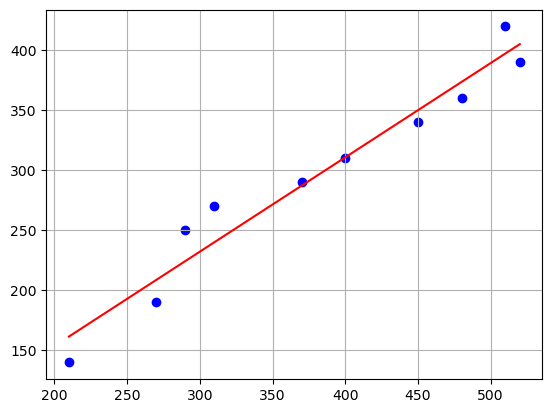

In [13]:
# ===== Twoja implementacja tutaj =====
w_mean = np.mean(w)
d_mean = np.mean(d)

a = np.sum((d - d_mean) * (w - w_mean)) / np.sum((d - d_mean)**2)
b = w_mean - a * d_mean
print(f"Regresja liniowa: w = {a:.4f}*d + {b:.2f}")
w_pred = a * d + b
mse = np.mean((w - w_pred)**2)
print(f"Błąd średniokwadratowy (MSE): {mse:.2f}")

plt.scatter(d, w, color='blue', label='Dane rzeczywiste')
plt.plot(d, w_pred, color='red', label='Regresja liniowa')
plt.grid(True)
plt.show()

---

### **Zadanie 4.**

W rzeczywistych problemach często dokładna postać analityczna analizowanego procesu nie jest znana, a dostępne są jedynie jego dane wejściowe i wyjściowe. W tym zadaniu przeprowadzona zostanie symulacja takiego scenariusza oraz opisany zostanie problem poszukiwania modelu analitycznego jak najdokładniej odzwierciedlającego analizowany proces.

<br>

**Punkt 1. Symulacja danych pomiarowych.**

Zdefiniowany jest rzeczywisty proces opisany następującą zależnością:

$$
y = 2 + x_1 - 0.5x_2 + \epsilon
$$

gdzie:
- $y$ - dane wyjściowe procesu,
- $x_1$, $x_2$ - mierzalne zmienne niezależne, które wpływają na proces,
- $\epsilon$ - zakłócenie procesu.

Należy przygotować dane procesu, które posłużą w Punkcie 2. do jego modelowania.

1. Przy użyciu funkcji [`np.random.normal()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) wygeneruj wektory kolumnowe danych wejściowych procesu ($\mathbf{x}_1$, $\mathbf{x}_2$) oraz wektor zakłóceń ($\mathbf{\epsilon}$) o wymiarze $(100,1)$. Każdy z nich powinien charakteryzować się średnią równą $0$ oraz odchyleniem standardowym równym $1$.

2. Oblicz wartości wektora $\mathbf{y}$ (dane wyjściowe procesu), korzystając z podanego wzoru opisującego proces oraz wektorów zdefiniowanych w poprzednim podpunkcie.

<br>

**Punkt 2. Modelowanie procesu.**


W Punkcie 1. opisany został rzeczywisty proces, na podstawie którego przygotowane zostały dane do analizy. W tym punkcie natomiast przyjmuje się założenie, że dokładne równanie procesu ($y = ...$) oraz wektor szumów ($\mathbf{\epsilon}$) nie są znane. Danymi, na których przeprowadzone będzie modelowanie, są jedynie wektory danych wejściowych ($\mathbf{x}_1$, $\mathbf{x}_2$) oraz danych wyjściowych ($\mathbf{y}$).

Wszystkie modele używane w ramach tego zadania będą postaci:

$$
\hat{y} \sim a + z_1 + z_2 + ... + z_n
$$

gdzie:
- $\hat{y}$ - przybliżenie modelowanego procesu,
- $a$ - wyraz wolny,
- $z_1 + z_2 + ... + z_n$ - zmienne niezależne, których ilość dobiera się na podstawie dostępnych danych, tak aby otrzymać jak najlepszy model.

Celem zadania jest wyznaczenie wektora współczynników [regresji liniowej](https://en.wikipedia.org/wiki/Linear_regression) $\mathbf{b}$, co sprowadza się do rozwiązania równania:

$$
\mathbf{y} = b_0 \cdot \mathbf{1} + b_1 \mathbf{z}_1 + b_2 \mathbf{z}_2 + ... + b_n \mathbf{z}_{n}
$$

które w postaci macierzowej przybiera postać:

$$
\mathbf{Z} \mathbf{b} = \mathbf{y}
$$

gdzie:
- $\mathbf{Z}$ - macierz rzeczywistych danych wejściowych do procesu,
- $\mathbf{b}$ - wektor współczynników regresji liniowej do wyliczenia,
- $\mathbf{y}$ - wektor rzeczywistych danych wyjściowych z procesu.

<br>

W ramach zadania przeanalizowane i porównane zostaną poniższe modele:
1. $\hat{y} \sim a + x_1$   
2. $\hat{y} \sim a + x_2$
3. $\hat{y} \sim a + x_1 + x_2$
4. $\hat{y} \sim a + x_1 + x_2 + x_1x_2$

Dla każdego z modeli zdefiniowanych powyżej:

1. Rozpisz analitycznie równanie opisujące model, analogicznie jak w opisie powyżej (np. $\mathbf{y} = b_0 \cdot \mathbf{1} + ... $). Opisz co oznaczają poszczególne elementy wzoru. 

2. Przedstaw otrzymane równanie w formie macierzowej i zdefiniuj $\mathbf{Z}$, $\mathbf{b}$ oraz $\mathbf{y}$. Podaj wymiary każdego z nich oraz napisz z czego wynikają.

3. Wyznacz wektor współczynników regresji liniowej ($\mathbf{b}$) wykorzystując rozkład QR.

4. Przedstaw na wykresie rzeczywiste wartości wyjściowe procesu ($\mathbf{y}$) oraz wyznaczoną funkcję regresji (pomiń ten podpunkt dla ostatniego modelu).


Po przeprowadzeniu analizy dla wszystkich modeli przeanalizuj znanymi metrykami otrzymane wyniki i je opisz.


> **Wskazówka:** Macierz $\mathbf{Z}$ składa się z konkatenacji wektorów kolumnowych zmiennych niezależnych oraz wektora kolumnowego wypełnionego jedynkami, odpowiadającego wyrazowi wolnemu w modelu ($\mathbf{Z} = [\mathbf{1}, \mathbf{z}_1, ... , \mathbf{z}_n]$). Do utworzenia takiej macierzy można posłużyć się funkcją [`np.concatenate()`](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html).
>
> Płaszczyznę regresji dla trzeciego modelu można wyrysować stosując [`np.meshgrid()`](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) oraz [`plot_wireframe()`](https://matplotlib.org/stable/plot_types/3D/wire3d_simple.html).
>
> Rozkład QR w skrócie: dane jest równanie: $\mathbf{A}\mathbf{x} = \mathbf{b}$. Jeżeli zdefiniujemy dodatkowo $\mathbf{A} = \mathbf{Q} \mathbf{R}$ to zachodzi: $\mathbf{R}\mathbf{x} = \mathbf{Q}^T\mathbf{b}$.

Model 1: y = b0 + b1*x1
Z1.shape: (100, 2) b1.shape: (2, 1)
Współczynniki b1:
 [[1.89889125]
 [1.01454667]]

Model 2: y = b0 + b1*x2
Z2.shape: (100, 2) b2.shape: (2, 1)
Współczynniki b2:
 [[ 1.9874213 ]
 [-0.33960524]]

Model 3: y = b0 + b1*x1 + b2*x2
Z3.shape: (100, 3) b3.shape: (3, 1)
Współczynniki b3:
 [[ 1.93313957]
 [ 1.06681637]
 [-0.45571415]]

Model 4: y = b0 + b1*x1 + b2*x2 + b3*(x1*x2)
Z4.shape: (100, 4) b4.shape: (4, 1)
Współczynniki b4:
 [[ 1.91232203]
 [ 1.07190389]
 [-0.46836536]
 [ 0.1774918 ]]


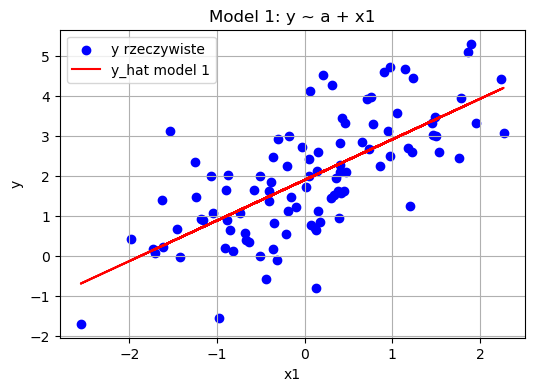

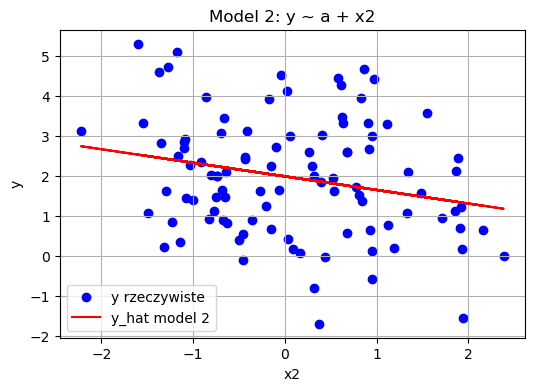

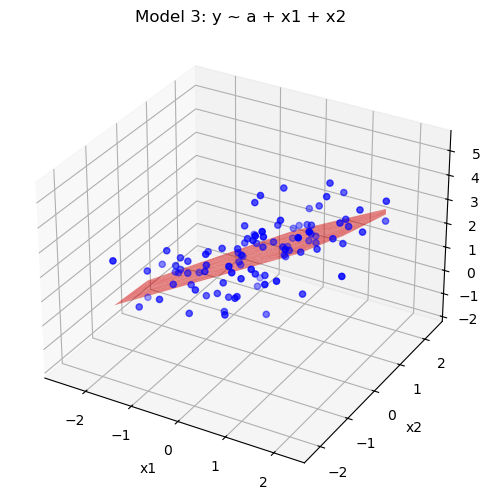

In [15]:
# ===== Twoja implementacja tutaj =====
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


np.random.seed(0)

n_samples = 100


x1 = np.random.normal(0, 1, (n_samples, 1))
x2 = np.random.normal(0, 1, (n_samples, 1))
epsilon = np.random.normal(0, 1, (n_samples, 1))


y = 2 + x1 - 0.5 * x2 + epsilon

def regression_qr(Z, y):
    Q, R = np.linalg.qr(Z)
    b = np.linalg.solve(R, Q.T @ y)
    return b


Z1 = np.concatenate([np.ones((n_samples,1)), x1], axis=1)
b1 = regression_qr(Z1, y)
print("Model 1: y = b0 + b1*x1")
print("Z1.shape:", Z1.shape, "b1.shape:", b1.shape)
print("Współczynniki b1:\n", b1)


Z2 = np.concatenate([np.ones((n_samples,1)), x2], axis=1)
b2 = regression_qr(Z2, y)
print("\nModel 2: y = b0 + b1*x2")
print("Z2.shape:", Z2.shape, "b2.shape:", b2.shape)
print("Współczynniki b2:\n", b2)


Z3 = np.concatenate([np.ones((n_samples,1)), x1, x2], axis=1)
b3 = regression_qr(Z3, y)
print("\nModel 3: y = b0 + b1*x1 + b2*x2")
print("Z3.shape:", Z3.shape, "b3.shape:", b3.shape)
print("Współczynniki b3:\n", b3)


x1x2 = x1 * x2
Z4 = np.concatenate([np.ones((n_samples,1)), x1, x2, x1x2], axis=1)
b4 = regression_qr(Z4, y)
print("\nModel 4: y = b0 + b1*x1 + b2*x2 + b3*(x1*x2)")
print("Z4.shape:", Z4.shape, "b4.shape:", b4.shape)
print("Współczynniki b4:\n", b4)


y_pred1 = Z1 @ b1
plt.figure(figsize=(6,4))
plt.scatter(x1, y, color='blue', label='y rzeczywiste')
plt.plot(x1, y_pred1, 'r', label='y_hat model 1')
plt.xlabel('x1')
plt.ylabel('y')
plt.title('Model 1: y ~ a + x1')
plt.legend()
plt.grid(True)
plt.show()

y_pred2 = Z2 @ b2
plt.figure(figsize=(6,4))
plt.scatter(x2, y, color='blue', label='y rzeczywiste')
plt.plot(x2, y_pred2, 'r', label='y_hat model 2')
plt.xlabel('x2')
plt.ylabel('y')
plt.title('Model 2: y ~ a + x2')
plt.legend()
plt.grid(True)
plt.show()

y_pred3 = Z3 @ b3
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y, color='blue', label='y rzeczywiste')
ax.plot_trisurf(x1.flatten(), x2.flatten(), y_pred3.flatten(), color='red', alpha=0.5)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_title('Model 3: y ~ a + x1 + x2')
plt.show()



---

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)